In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
df = gpd.read_file('/data/acker/ALA/ranks_washu_max_2021-2023.csv')
df

,field_1,GEOID,PM25_90th,geometry,STATEFP,COUNTYFP,CDVE_rank
0,0,01001,7.799999713897705,"POLYGON ((-86.921196 32.657542, -86.920352 32....",01,001,1085
1,1,01003,8.466667175292969,"POLYGON ((-88.02858 30.226763, -88.023991 30.2...",01,003,413
2,2,01005,7.666666507720947,"POLYGON ((-85.748032 31.619181, -85.745435 31....",01,005,1230
3,3,01007,8.266667366027832,"POLYGON ((-87.421936 33.003379, -87.331769 33....",01,007,599
4,4,01009,7.633333206176758,"POLYGON ((-86.963358 33.858221, -86.959667 33....",01,009,1278
...,...,...,...,...,...,...,...
3137,3137,56037,5.466666698455811,"POLYGON ((-110.054384 42.01103, -110.054363 42...",56,037,2954
3138,3138,56039,5.033333301544189,"POLYGON ((-111.053610326574 44.6662669770011, ...",56,039,3035
3139,3139,56041,6.333333492279053,"POLYGON ((-111.046626637972 41.1401249258729, ...",56,041,2637
3140,3140,56043,5.266666412353516,"POLYGON ((-108.550628 44.151793, -108.550562 4...",56,043,2994


In [2]:
df1 = df.drop('geometry',axis=1)

In [3]:
#upload shapefile of U.S. counties
counties = gpd.read_file('/data/acker/shapefiles/cb_2020_us_county_500k.shp')

In [4]:
# List of state abbreviations for CONUS, Alaska (AK), and Hawaii (HI)
states_to_include = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'DC',
    'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
    'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
    'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
    'WI', 'WY'
]

# Filter counties to only include rows where STUSPS is in the specified list
counties_conus = counties[counties['STUSPS'].isin(states_to_include)]

# Display the filtered counties
counties_conus

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,031,00350302,0500000US13031,13031,Bulloch,Bulloch County,GA,Georgia,06,1750735216,32827779,"POLYGON ((-82.02684 32.55516, -82.02527 32.558..."
1,13,121,01694833,0500000US13121,13121,Fulton,Fulton County,GA,Georgia,06,1364133162,19666288,"POLYGON ((-84.84931 33.51318, -84.84429 33.514..."
2,13,179,00357095,0500000US13179,13179,Liberty,Liberty County,GA,Georgia,06,1337654102,222884791,"POLYGON ((-81.8244 32.01488, -81.81338 32.0162..."
3,13,189,00348794,0500000US13189,13189,McDuffie,McDuffie County,GA,Georgia,06,666590014,23114032,"POLYGON ((-82.64852 33.60838, -82.64409 33.606..."
4,13,213,01688005,0500000US13213,13213,Murray,Murray County,GA,Georgia,06,892235145,5719644,"POLYGON ((-84.94434 34.68004, -84.9431 34.6804..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,41,049,01135860,0500000US41049,41049,Morrow,Morrow County,OR,Oregon,06,5259046087,44372730,"POLYGON ((-120.00631 45.27648, -120.00556 45.3..."
3229,21,073,00516883,0500000US21073,21073,Franklin,Franklin County,KY,Kentucky,06,538312209,10786432,"POLYGON ((-85.02426 38.13059, -85.02299 38.131..."
3230,17,201,01785216,0500000US17201,17201,Winnebago,Winnebago County,IL,Illinois,06,1328792556,15873993,"POLYGON ((-89.40142 42.50043, -89.37175 42.500..."
3231,17,123,00424260,0500000US17123,17123,Marshall,Marshall County,IL,Illinois,06,1001843226,30364348,"POLYGON ((-89.63869 40.98691, -89.63868 40.988..."


In [5]:
counties_conus = counties_conus.drop(['STATEFP', 'COUNTYFP', "COUNTYNS", 'NAMELSAD', 'LSAD', 'ALAND', 'AWATER', 'AFFGEOID'], axis=1)

In [6]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
df_counties = df1.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
df_counties = gpd.GeoDataFrame(df_counties, geometry='geometry')

# Display the result
df_counties

,field_1,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,geometry,STUSPS
0,0,01001,7.799999713897705,01,001,1085,"POLYGON ((-86.9212 32.65754, -86.92035 32.6585...",AL
1,1,01003,8.466667175292969,01,003,413,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",AL
2,2,01005,7.666666507720947,01,005,1230,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",AL
3,3,01007,8.266667366027832,01,007,599,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",AL
4,4,01009,7.633333206176758,01,009,1278,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",AL
...,...,...,...,...,...,...,...,...
3137,3137,56037,5.466666698455811,56,037,2954,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",WY
3138,3138,56039,5.033333301544189,56,039,3035,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",WY
3139,3139,56041,6.333333492279053,56,041,2637,"POLYGON ((-111.04663 41.14012, -111.04662 41.1...",WY
3140,3140,56043,5.266666412353516,56,043,2994,"POLYGON ((-108.55063 44.15179, -108.55056 44.1...",WY


In [7]:
df_counties['PM25_90th'] = df_counties['PM25_90th'].astype('float32')

In [8]:
# Extract the North Slope row from `counties_conus`
north_slope = counties_conus[counties_conus['GEOID'] == '02185'].copy()

# Set the `PM25_90th` column to None (or NaN) so it appears gray on the plot
north_slope['PM25_90th'] = None

'''# Append this row to the `county_90th_percentile_with_geometry` DataFrame
county_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)

# Ensure it's a GeoDataFrame with the correct geometry
county_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')'''

"# Append this row to the `county_90th_percentile_with_geometry` DataFrame\ncounty_90th_percentile_with_geometry = pd.concat([county_90th_percentile_with_geometry, north_slope], ignore_index=True)\n\n# Ensure it's a GeoDataFrame with the correct geometry\ncounty_90th_percentile_with_geometry = gpd.GeoDataFrame(county_90th_percentile_with_geometry, geometry='geometry')"

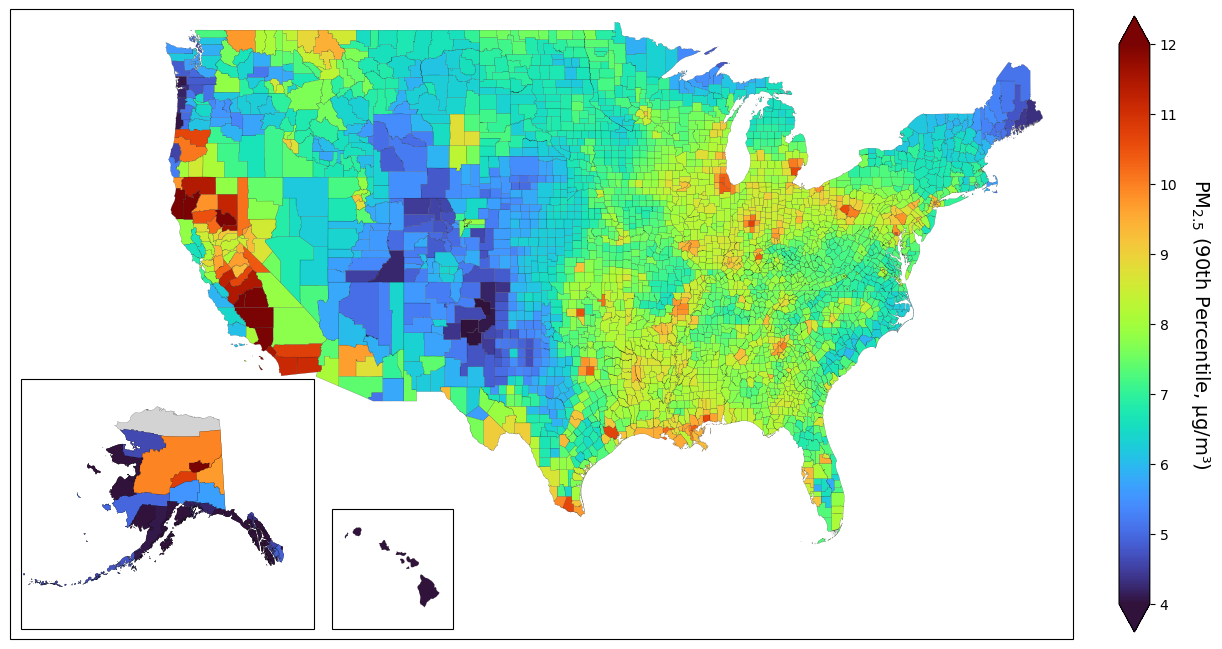

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = df_counties.to_crs(epsg=4326)
# Define the data column and color map
data_column = 'PM25_90th'
cmap = 'turbo'
norm = mpl.colors.Normalize(vmin=4, vmax=12)  # Adjust vmin and vmax based on your data range

# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.19, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot Alaska counties
alaska_counties.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black',
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.19, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_conus, missing_kwds=missing_kwds
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_alaska, missing_kwds=missing_kwds, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    column=data_column, cmap=cmap, norm=norm, linewidth=0.1, edgecolor='black', 
    ax=ax_hawaii, missing_kwds=missing_kwds
)

# Plot North Slope separately in gray

# Add a colorbar to the main map
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set array to an empty array to use custom normalization
cbar = fig.colorbar(sm, ax=ax_conus, orientation='vertical', fraction=0.046, pad=0.04, shrink=0.8, extend='both')
cbar.set_label('PM$_{2.5}$ (90th Percentile, µg/m³)', fontsize=14, rotation=270, labelpad=25)

# Add a title to the plot
plt.show()


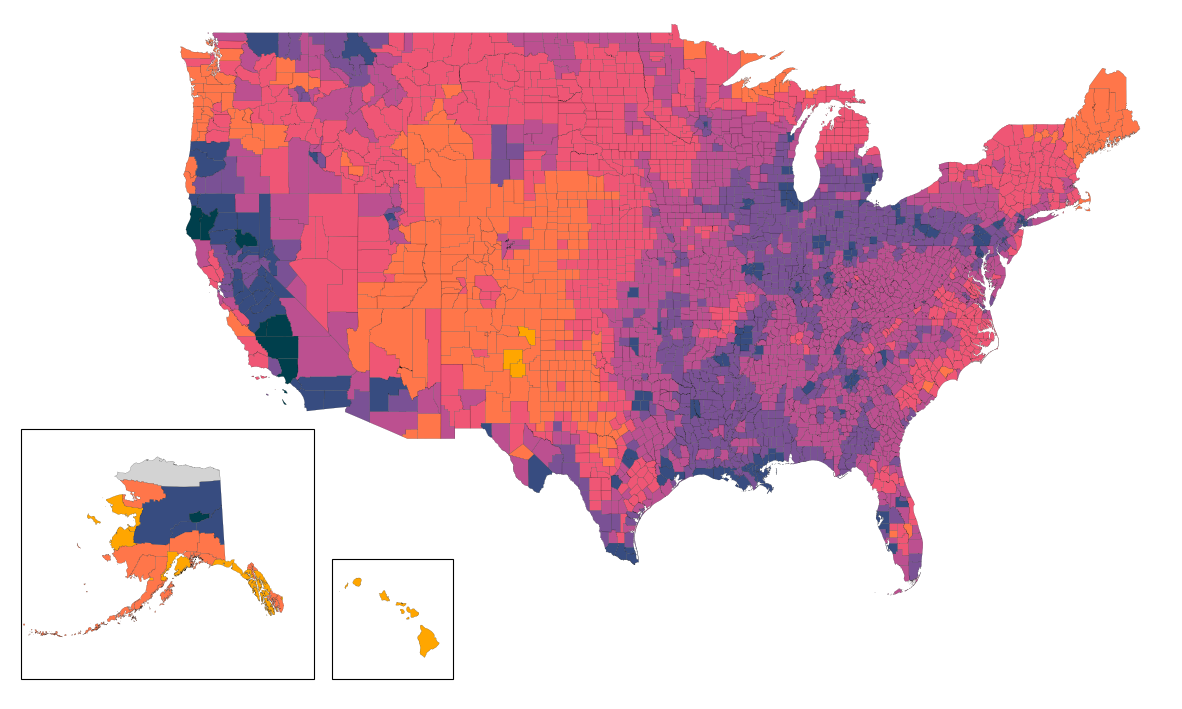

In [10]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

county_90th_percentile_with_geometry = county_90th_percentile_with_geometry.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "> 12 µg/m³": "#003f4c",
    "9 - 12 µg/m³": "#374c80",
    "8 - 9 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value <= 9:
        return range_colors["8 - 9 µg/m³"]
    elif 9 < value <= 12:
        return range_colors["9 - 12 µg/m³"]
    else:  # > 12
        return range_colors["> 12 µg/m³"]

# Create a new column for colors
county_90th_percentile_with_geometry['color'] = county_90th_percentile_with_geometry[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Filter for Alaska counties excluding North Slope
alaska_counties = county_90th_percentile_with_geometry[
    (county_90th_percentile_with_geometry['GEOID'].str.startswith('02')) & 
    (county_90th_percentile_with_geometry['GEOID'] != '02185')
]

# Plot Alaska counties
'''alaska_counties.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

# Plot the data for each map, including the color for missing data
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color=county_90th_percentile_with_geometry['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9 µg/m³", "9 - 12 µg/m³", "> 12 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)
# Load custom font
plt.rcParams["font.family"] = "serif"

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.9, 2.2),  # Adjusted to place it in the lower right corner
    title="2021-2023",
    fontsize=14,
    title_fontsize=15
)'''

# Add a title to the plot
plt.savefig('all_cdves.jpg', dpi=1000)
plt.show()


In [64]:
# epa CDVs for pearson
merged_df = pd.read_csv('/data/acker/ALA/washu_2021-2023_merged.csv')

In [65]:
merged_df = merged_df.drop('geometry', axis=1)

In [66]:
counties_conus['GEOID'] = counties_conus['GEOID'].astype(int)

In [67]:
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
df_merged = merged_df.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
df_merged = gpd.GeoDataFrame(df_merged, geometry='geometry')
df_merged['PM25_90th'] = df_merged['PM25_90th'].astype('float32')
df_merged['Design Value'] = df_merged['Design Value'].astype('float32')


# Display the result
df_merged

,Unnamed: 0,index,GEOID,PM25_90th,STATEFP,COUNTYFP,CDVE_rank,ID,Design Value,geometry,STUSPS
0,0,0,2090,14.333333,2,90,1,02_090,12.100000,"POLYGON ((-148.66326 64.59079, -148.64821 64.5...",AK
1,1,1,6063,14.200000,6,63,2,06_063,14.000000,"POLYGON ((-121.49703 40.43702, -121.49487 40.4...",CA
2,2,2,6107,12.933334,6,107,4,06_107,15.700000,"POLYGON ((-119.56647 36.49434, -119.56366 36.4...",CA
3,3,3,6023,12.633334,6,23,5,06_023,6.900000,"POLYGON ((-124.4086 40.4432, -124.39664 40.462...",CA
4,4,4,6029,12.599999,6,29,6,06_029,16.200001,"POLYGON ((-120.19437 35.78936, -120.00308 35.7...",CA
...,...,...,...,...,...,...,...,...,...,...,...
531,531,531,2020,4.133333,2,20,3118,02_020,5.100000,"MULTIPOLYGON (((-150.07348 61.15834, -150.0691...",AK
532,532,532,2110,3.900000,2,110,3128,02_110,4.600000,"MULTIPOLYGON (((-134.66932 58.33327, -134.6675...",AK
533,533,533,15001,3.633333,15,1,3133,15_001,4.400000,"POLYGON ((-156.06147 19.72813, -156.06076 19.7...",HI
534,534,534,15009,3.556667,15,9,3136,15_009,4.000000,"MULTIPOLYGON (((-156.69742 20.91637, -156.6957...",HI


In [68]:
unmonitored_df = pd.read_csv('/data/acker/ALA/washu_2021-2023_unmonitored.csv')

In [69]:
unmonitored_df = unmonitored_df.drop('geometry', axis=1)
# Merge the 90th percentile data with the counties GeoDataFrame to include geometry
unmonitored_counties = unmonitored_df.merge(counties_conus[['GEOID', 'geometry','STUSPS']], on='GEOID', how='left')

# Convert to a GeoDataFrame if necessary
unmonitored_counties = gpd.GeoDataFrame(unmonitored_counties, geometry='geometry')
unmonitored_counties['PM25_90th'] = unmonitored_counties['PM25_90th'].astype('float32')

# Display the result
unmonitored_counties

,Unnamed: 0,GEOID,PM25_90th,STATEFP,COUNTYFP,STUSPS_x,CDVE_rank,ID,range,geometry,STUSPS_y
0,0,1001,7.800000,1,1,AL,1085,01_001,Dirtiest 50%,"POLYGON ((-86.9212 32.65754, -86.92035 32.6585...",AL
1,2,1005,7.666667,1,5,AL,1230,01_005,Dirtiest 50%,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",AL
2,3,1007,8.266667,1,7,AL,599,01_007,Dirtiest 25%,"POLYGON ((-87.42194 33.00338, -87.33177 33.005...",AL
3,4,1009,7.633333,1,9,AL,1278,01_009,Dirtiest 50%,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",AL
4,5,1011,7.333333,1,11,AL,1680,01_011,Cleanest 50%,"POLYGON ((-85.99926 32.25018, -85.98655 32.250...",AL
...,...,...,...,...,...,...,...,...,...,...,...
2601,3134,56031,5.833333,56,31,WY,2850,56_031,Cleanest 50%,"POLYGON ((-105.28651 42.60583, -105.25054 42.6...",WY
2602,3137,56037,5.466667,56,37,WY,2954,56_037,Cleanest 50%,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",WY
2603,3139,56041,6.333333,56,41,WY,2637,56_041,Cleanest 50%,"POLYGON ((-111.04663 41.14012, -111.04662 41.1...",WY
2604,3140,56043,5.266666,56,43,WY,2994,56_043,Cleanest 50%,"POLYGON ((-108.55063 44.15179, -108.55056 44.1...",WY


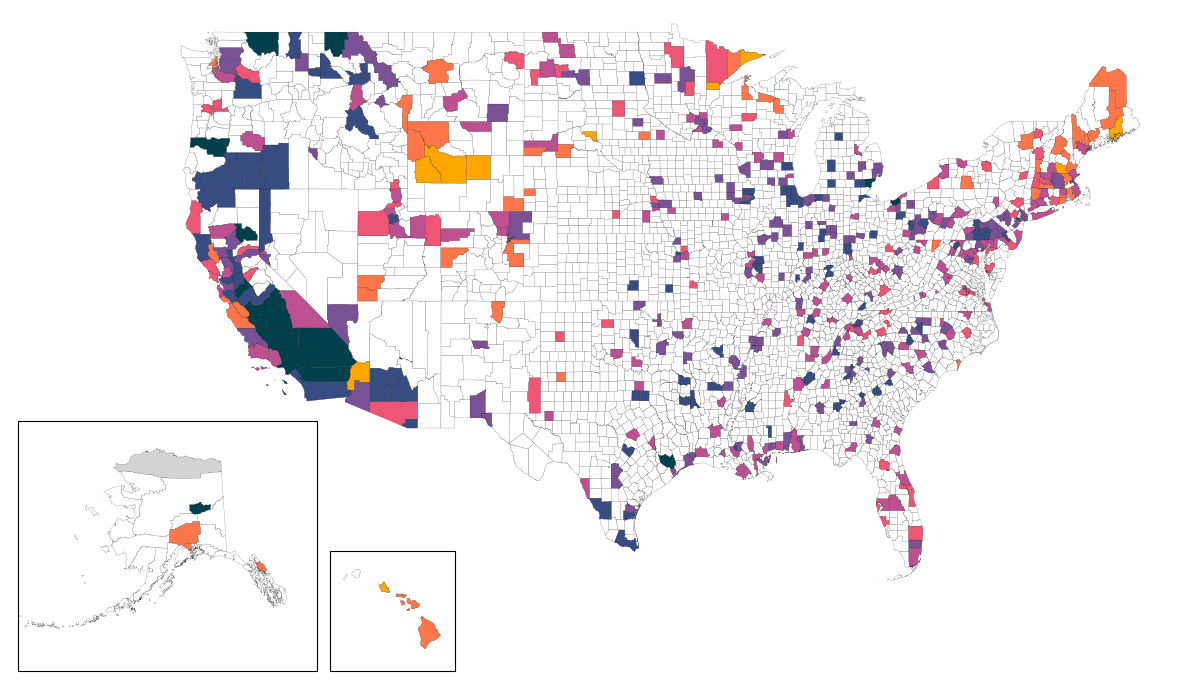

In [70]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

gdf_epa = df_merged.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'Design Value'
range_colors = {
    "> 12 µg/m³": "#003f4c",
    "9 - 12 µg/m³": "#374c80",
    "8 - 9 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value <= 9:
        return range_colors["8 - 9 µg/m³"]
    elif 9 < value <= 12:
        return range_colors["9 - 12 µg/m³"]
    else:  # > 12
        return range_colors["> 12 µg/m³"]

# Create a new column for colors
gdf_epa['color'] = gdf_epa[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)
# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds

# Plot Alaska counties
'''alaska_counties.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)


# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
gdf_epa.plot(
    color=gdf_epa['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9 µg/m³", "9 - 12 µg/m³", "> 12 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('epa_dv.jpg', dpi=1000)
plt.show()


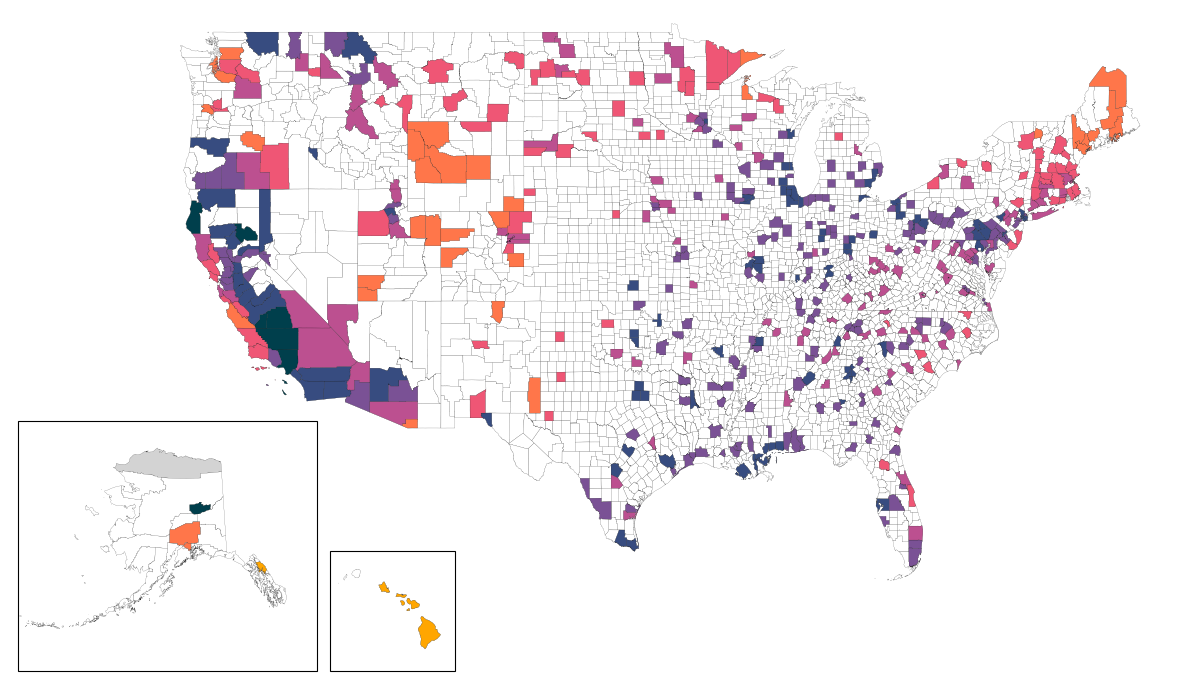

In [71]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

monitor_sat = df_merged.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "> 12 µg/m³": "#003f4c",
    "9 - 12 µg/m³": "#374c80",
    "8 - 9 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

'''# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]'''

# Create a new column for colors
monitor_sat['color'] = monitor_sat[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds


# Plot Alaska counties
'''alaska_counties.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
monitor_sat.plot(
    color=monitor_sat['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9 µg/m³", "9 - 12 µg/m³", "> 12 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('monitor_CDVE.jpg', dpi=1000)
plt.show()


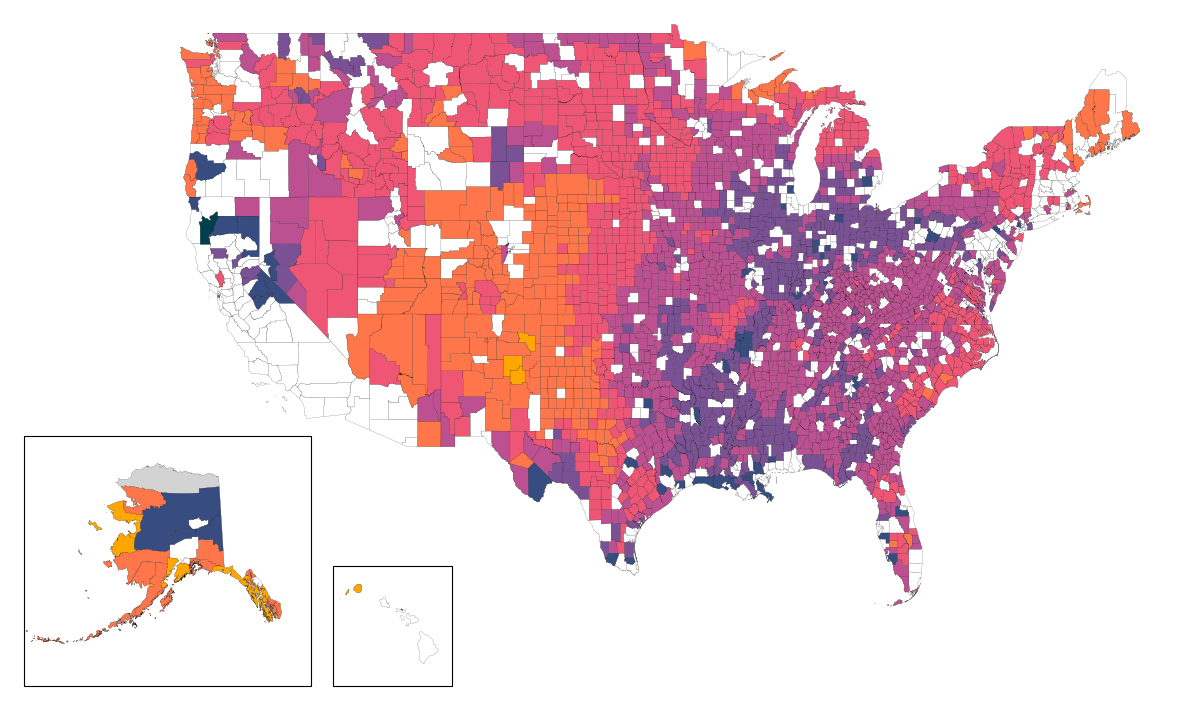

In [72]:
#figure 3
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import geopandas as gpd

unmonitored_counties = unmonitored_counties.to_crs("EPSG:4326")

# Define the data column and the range colors
data_column = 'PM25_90th'
range_colors = {
    "> 12 µg/m³": "#003f4c",
    "9 - 12 µg/m³": "#374c80",
    "8 - 9 µg/m³": "#7a5195",
    "7 - 8 µg/m³": "#bc5090",
    "6 - 7 µg/m³": "#ef5675",
    "4 - 6 µg/m³": "#ff764a",
    "< 4 µg/m³": "#ffa600",
}

'''# Assign colors manually
def assign_color(value):
    if pd.isna(value):
        return 'white'
    elif value < 4:
        return range_colors["< 4 µg/m³"]
    elif 4 <= value < 6:
        return range_colors["4 - 6 µg/m³"]
    elif 6 <= value < 7:
        return range_colors["6 - 7 µg/m³"]
    elif 7 <= value < 8:
        return range_colors["7 - 8 µg/m³"]
    elif 8 <= value < 9.1:
        return range_colors["8 - 9.1 µg/m³"]
    elif 9.1 <= value < 12.1:
        return range_colors["9.1 - 12.1 µg/m³"]
    else:  # > 12
        return range_colors["≥ 12.1 µg/m³"]'''

# Create a new column for colors
unmonitored_counties['color'] = unmonitored_counties[data_column].apply(assign_color)


# Create the main figure
fig = plt.figure(figsize=(15, 10))

# Main map (CONUS)
ax_conus = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax_conus.set_extent([-135, -65, 20, 50], crs=ccrs.PlateCarree())  # CONUS bounds
ax_conus.set_frame_on(False)

# Alaska inset with rotation and correct projection
# Alaska inset with a rotated projection
alaska_projection = ccrs.AlbersEqualArea(central_longitude=-150, central_latitude=60)
ax_alaska = fig.add_axes([0.12, 0.17, 0.22, 0.25], projection=alaska_projection)

ax_alaska.set_extent([-180, -126, 50, 72], crs=ccrs.PlateCarree())  # Alaska bounds


# Plot Alaska counties
'''alaska_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)'''

# Plot North Slope separately in gray
north_slope.plot(
    ax=ax_alaska, color='lightgray', edgecolor='black', linewidth=0.1, 
    transform=ccrs.PlateCarree()
)

# Hawaii inset positioned within the main figure, next to Alaska inset
ax_hawaii = fig.add_axes([0.32, 0.17, 0.12, 0.12], projection=ccrs.PlateCarree())
ax_hawaii.set_extent([-161, -154, 18, 23], crs=ccrs.PlateCarree())  # Hawaii bounds

# Missing data color
missing_kwds = {"color": "lightgray", "edgecolor": "black", "linewidth": 0.1}

county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_conus
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
county_90th_percentile_with_geometry.plot(
    color='white', linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Plot the data for each map, including the color for missing data
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_conus
)
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_alaska, transform=ccrs.PlateCarree()
)
unmonitored_counties.plot(
    color=unmonitored_counties['color'], linewidth=0.1, edgecolor='black', ax=ax_hawaii
)

# Add a custom legend
# Reverse the legend patches so the highest value is at the top
#legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(["N/A"]+labels)]
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Add a custom legend
labels = ["< 4 µg/m³", "4 - 6 µg/m³", "6 - 7 µg/m³", "7 - 8 µg/m³", "8 - 9 µg/m³", "9 - 12 µg/m³", "> 12 µg/m³"]
# Reverse the legend patches so the highest value is at the top
legend_patches = [mpatches.Patch(color=range_colors[label], label=label) for label in reversed(labels)]

# Add N/A patch with custom styling (white with a black outline)
na_patch = mpatches.Patch(facecolor="white", edgecolor="black", label="N/A")


# Combine all legend patches
legend_patches.append(na_patch)

'''plt.legend(
    handles=legend_patches,
    bbox_to_anchor=(6.8, 1.9),  # Adjusted to place it in the lower right corner
    title="2020-2022",
    fontsize=11,
    title_fontsize=12
)'''

# Add a title to the plot
plt.savefig('unmon_CDVE.jpg', dpi=1000)
plt.show()
